In [18]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


data_pth = 'C:/Users/Francis/OneDrive/Desktop/Code/ML馬拉松/Validation/modelpoint/'

df = pd.read_csv(data_pth + 'house_train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
Id = df['Id']
train_Y = np.log1p(df['SalePrice'])
df = df.drop(['Id'],axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


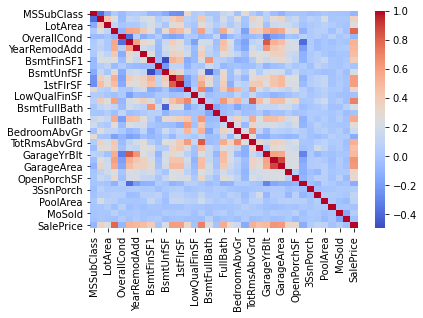

In [20]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
house_corr = df.corr()
sns.heatmap(house_corr,cmap = 'coolwarm')
plt.show()

In [21]:
df = df.drop(['SalePrice'],axis = 1)

num_feature = []
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype == "int64" or dtype == 'float64':
        num_feature.append(feature)
print(f'{len(num_feature)} Numeric Feature : {num_feature}')

df = df[num_feature]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

36 Numeric Feature : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [40]:
# 篩選相關係數大於 0.1 或小於 -0.1 的特徵
high_list = list(house_corr[(house_corr['SalePrice'] > 0.1) | (house_corr['SalePrice'] < -0.1)].index)
high_list.pop()
print(high_list)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [46]:
#未加入相關性特徵
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
estimator2 = GradientBoostingRegressor()
print(cross_val_score(estimator,train_X,train_Y,cv = 5).mean())
print(cross_val_score(estimator2,train_X,train_Y,cv = 5).mean())

0.8437887696941372
0.8864387970234328


In [47]:
#加入相關特徵
train_X = df[high_list]
print(cross_val_score(estimator,train_X,train_Y,cv = 5).mean())
print(cross_val_score(estimator2,train_X,train_Y,cv = 5).mean())

0.8288821541594213
0.8723840244869463


In [50]:
#使用Lasso Regression
from sklearn.linear_model import Lasso
L1_Reg = Lasso(alpha = 0.001)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X,train_Y)
L1_Reg.coef_

Lasso(alpha=0.001)

In [57]:
L1_mask = list((L1_Reg.coef_ > 0) | (L1_Reg.coef_ < 0))
df.columns[L1_mask] 

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'YrSold'],
      dtype='object')

In [63]:
from itertools import compress
L1_mask = list((L1_Reg.coef_ > 0) | (L1_Reg.coef_ < 0))
L1_list = list(compress(list(df),list(L1_mask)))
L1_list

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'YrSold']

In [65]:
#l1_Embedding特徵 
train_X = MMEncoder.fit_transform(df[L1_list])
estimator = LinearRegression()
estimator2 = GradientBoostingRegressor()
print(cross_val_score(estimator,train_X,train_Y,cv = 5).mean())
print(cross_val_score(estimator2,train_X,train_Y,cv = 5).mean())



0.847590140372567
0.8845669206890789


作業1
鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?
作業2
續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

data_pth = 'C:/Users/Francis/OneDrive/Desktop/Code/ML馬拉松/Validation/modelpoint/'
df = pd.read_csv(data_pth + 'titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
Ids = df['PassengerId']
train_Y = df['Survived']
df = df.drop(['PassengerId'],axis = 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


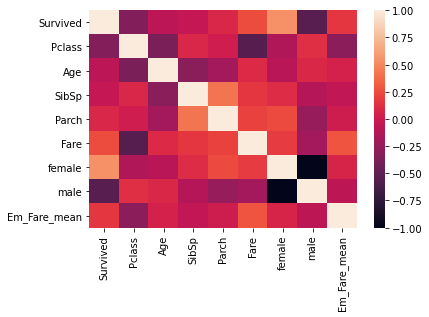

In [96]:
#使用相關係數
import seaborn as sns
import matplotlib.pyplot as plt
df = df.join(pd.get_dummies(df['Sex']))
df['Embarked'] = df['Embarked'].fillna('None')
Ed_Fr_mean = df.groupby(['Embarked'])['Fare'].mean().reset_index()
Ed_Fr_mean.columns = ['Embarked','Em_Fare_mean']
df = pd.merge(df,Ed_Fr_mean,how = 'left', on = 'Embarked')
df = df.drop(['Embarked'],axis = 1)
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [97]:
df = df.drop(['Survived'] , axis = 1)
num_feature = []
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype == 'int64' or dtype == 'float64' or dtype == 'uint8':
        num_feature.append(feature)
print(f'{len(num_feature)} numeric features : {num_feature}')

df = df[num_feature]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

8 numeric features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'Em_Fare_mean']


,Pclass,Age,SibSp,Parch,Fare,female,male,Em_Fare_mean
0,3,22.0,1,0,7.2500,0,1,27.079812
1,1,38.0,1,0,71.2833,1,0,59.954144
2,3,26.0,0,0,7.9250,1,0,27.079812
3,1,35.0,1,0,53.1000,1,0,27.079812
4,3,35.0,0,0,8.0500,0,1,27.079812


In [98]:
# 原始特徵 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LogisticRegression()
print(cross_val_score(estimator,train_X,train_Y,cv = 5).mean())

0.7755257046010922


In [99]:
#篩選相關係數
high_list = list(corr[(corr['Survived'] > 0.3)|(corr['Survived'] < -0.3)].index)
high_list.pop(0)
df_high_list = df[high_list]

In [100]:
X_train = MMEncoder.fit_transform(df_high_list)
print(cross_val_score(estimator,X_train,train_Y,cv = 5).mean())

0.7867365513778168


作業2:
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

In [106]:
from sklearn.linear_model import Lasso
L1_Reg = Lasso(alpha = 0.005)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X,train_Y)
L1_Reg.coef_

array([-2.96926306e-01, -4.84398874e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.95889798e-01, -2.75177556e-16,  1.89123820e-02])

In [107]:
L1_map = list((L1_Reg.coef_ > 0)|(L1_Reg.coef_ < 0))

In [109]:
df.columns[L1_map]

Index(['Pclass', 'Age', 'female', 'male', 'Em_Fare_mean'], dtype='object')

In [110]:
from itertools import compress
L1_list = list(compress(list(df),list(L1_map)))

In [111]:
L1_list

['Pclass', 'Age', 'female', 'male', 'Em_Fare_mean']

In [113]:
train_X = MMEncoder.fit_transform(df[L1_list])
print(cross_val_score(estimator,train_X,train_Y,cv = 5).mean())

0.7721549180842382
